In [108]:
# # Uncomment to use autoreload
# %load_ext autoreload
# %autoreload 2

# import os
# import os.path as osp
# import sys
# import torch
# import numpy as np
# from time import time
# from omegaconf import OmegaConf
# start = time()
# import warnings
# warnings.filterwarnings('ignore')

# # torch.cuda.set_device(I_GPU)
# DIR = os.path.dirname(os.getcwd())
# ROOT = os.path.join(DIR, "..")
# sys.path.insert(0, ROOT)
# sys.path.insert(0, DIR)

# from torch_points3d.utils.config import hydra_read
# from torch_geometric.data import Data
# from torch_points3d.core.multimodal.data import MMData, MMBatch
# from torch_points3d.visualization.multimodal_data import visualize_mm_data
# from torch_points3d.core.multimodal.image import SameSettingImageData, ImageData
# from torch_points3d.datasets.segmentation.multimodal.scannet import ScannetDatasetMM
# from torch_points3d.datasets.segmentation.scannet import CLASS_COLORS, CLASS_NAMES, CLASS_LABELS
# from torch_points3d.metrics.segmentation_tracker import SegmentationTracker
# from torch_points3d.datasets.segmentation import IGNORE_LABEL
# from torch_points3d.metrics.scannet_segmentation_tracker import ScannetSegmentationTracker
# from torch_points3d.metrics.colored_tqdm import Coloredtqdm as Ctq


# CLASS_COLORS[0] = (174.0, 199.0, 232.0)
# CLASS_COLORS[-1] = (0, 0, 0)
# import plotly.io as pio
# import seaborn as sns

# #pio.renderers.default = 'jupyterlab'        # for local notebook
# pio.renderers.default = 'iframe_connected'  # for remote notebook. Other working (but seemingly slower) options are: 'sphinx_gallery' and 'iframe'

# import matplotlib.pyplot as plt 
# %matplotlib inline

In [109]:
# def get_seen_points(mm_data):
#     ### Select seen points
#     csr_idx = mm_data.modalities['image'][0].view_csr_indexing
#     dense_idx_list = torch.arange(mm_data.modalities['image'][0].num_points).repeat_interleave(csr_idx[1:] - csr_idx[:-1])
#     # take subset of only seen points without re-indexing the same point
#     mm_data = mm_data[dense_idx_list.unique()]
#     return mm_data

# def get_mode_pred(data):
#     pixel_validity = data.data.mvfusion_input[:, :, 0].bool()
#     mv_preds = data.data.mvfusion_input[:, :, -1].long()
            
#     valid_m2f_feats = []
#     for i in range(len(mv_preds)):
#         valid_m2f_feats.append(mv_preds[i][pixel_validity[i]])

#     mode_preds = []
#     for m2feats_of_seen_point in valid_m2f_feats:
#         mode_preds.append(torch.mode(m2feats_of_seen_point.squeeze(), dim=0)[0])
#     mode_preds = torch.stack(mode_preds, dim=0)
        
#     return mode_preds

# def get_random_view_pred(data):
#     pixel_validity = data.data.mvfusion_input[:, :, 0].bool()
#     mv_preds = data.data.mvfusion_input[:, :, -1].long()
            
#     valid_m2f_feats = []
#     for i in range(len(mv_preds)):
#         valid_m2f_feats.append(mv_preds[i][pixel_validity[i]])

#     selected_view_preds = []
#     for m2feats_of_seen_point in valid_m2f_feats:
#         selected_idx = torch.randint(low=0, high=m2feats_of_seen_point.shape[0], size=(1,))
#         selected_pred = m2feats_of_seen_point[selected_idx].squeeze(0)
#         selected_view_preds.append(selected_pred)
#     selected_view_preds = torch.stack(selected_view_preds, dim=0)
        
#     return selected_view_preds


In [110]:
# # Set your dataset root directory, where the data was/will be downloaded
# DATA_ROOT = '/scratch-shared/fsun/dvata'

# dataset_config = 'segmentation/multimodal/Feng/scannet-neucon-smallres-m2f-allviews'   


# print("Load MVFusion_3D")
# models_config = 'segmentation/multimodal/Feng/mvfusion'    # model family
# model_name = 'MVFusion_3D_small'                       # specific model


# # print("Load MVFusion")
# # dataset_config = 'segmentation/multimodal/Feng/scannet-neucon-smallres-m2f-no-transforms'   
# # models_config = 'segmentation/multimodal/Feng/mvfusion_orig'    # model family
# # model_name = 'MVFusion_orig'

# overrides = [
#     'task=segmentation',
#     f'data={dataset_config}',
#     f'models={models_config}',
#     f'model_name={model_name}',
#     f'data.dataroot={DATA_ROOT}',
# ]

# cfg = hydra_read(overrides)
# OmegaConf.set_struct(cfg, False)  # This allows getattr and hasattr methods to function correctly
# cfg.data.load_m2f_masks = True   # load Mask2Former predicted masks
# cfg.data.m2f_preds_dirname = 'm2f_masks'
# cfg.data.n_views = cfg.models[model_name].backbone.transformer.n_views
# print(cfg.data.n_views)

# # Dataset instantiation
# start = time()
# dataset = ScannetDatasetMM(cfg.data)
# # print(dataset)|
# print(f"Time = {time() - start:0.1f} sec.")

In [111]:
# from torch_points3d.models.model_factory import instantiate_model

# # ViT_masks 3rd run
# # checkpoint_dir = '/home/fsun/DeepViewAgg/outputs/ViT_masks_3rd_run' # 3rd run

# # ViT_masks 9 views, MVFusion_3D_small
# checkpoint_dir = '/home/fsun/DeepViewAgg/outputs/2023-01-25/16-02-53'


# # # MVFusion_orig
# # checkpoint_dir = '/home/fsun/DeepViewAgg/outputs/MVFusion_orig'



# # Create the model
# print(f"Creating model: {cfg.model_name}")
# model = instantiate_model(cfg, dataset)
# # print(model)

# # Load the checkpoint and recover the 'best_miou' model weights
# checkpoint = torch.load(f'{checkpoint_dir}/{model_name}.pt', map_location='cpu')
# model.load_state_dict_with_same_shape(checkpoint['models']['best_miou'], strict=False)

# # Prepare the model for training
# model = model.cuda()
# print('Model loaded')

In [112]:
# # Load refined masks
# # dataset.val_dataset.m2f_preds_dirname = 'm2f_masks_refined/Deepset_3D'
# # dataset.val_dataset.gt_dir_name = 'm2f_masks_refined/Deepset_3D'
# print(dataset.val_dataset.m2f_preds_dirname)
# print(dataset.val_dataset.gt_dir_name)

# # Create validation loader
# dataset.create_dataloaders(
#     model,
#     1,
#     False,
#     17,
#     False,
#     train_only=False,
#     val_only=True,
#     test_batch_size=1
# )

# # Create segmentation tracker
# tracker_input = ScannetSegmentationTracker(dataset=dataset, stage='val', wandb_log=False, use_tensorboard=False, ignore_label=IGNORE_LABEL)
# tracker_refined = ScannetSegmentationTracker(dataset=dataset, stage='val', wandb_log=False, use_tensorboard=False, ignore_label=IGNORE_LABEL)


# with Ctq(dataset.val_dataloader) as loader:
#     for batch in loader:
#         # Input and refined masks, labels sampled based on the 2D-3D mapping
#         input_pred = batch.modalities['image'][0].get_mapped_m2f_features().flatten()
#         refined_pred = batch.modalities['image'][0].get_mapped_gt_labels().flatten()# + 1   # label off-set 
        
#         # Number of views for each point
#         csr_idx = batch.modalities['image'][0].view_csr_indexing
#         n_seen = csr_idx[1:] - csr_idx[:-1]
        
#         gt = batch.y
#         gt = torch.repeat_interleave(gt, n_seen)

#         tracker_input.track(pred_labels=input_pred, gt_labels=gt, model=None)
#         tracker_refined.track(pred_labels=refined_pred, gt_labels=gt, model=None)
        
# print(tracker_input.get_metrics())
# print(tracker_refined.get_metrics())



In [113]:
# idx = 66
# scan_id = dataset.val_dataset.MAPPING_IDX_TO_SCAN_VAL_NAMES[idx]
# mm_data = dataset.val_dataset[idx]
# print(scan_id)

In [94]:
mm_data

MMData(
    data = Data(coords=[123705, 3], grid_size=[1], id_scan=[1], mapping_index=[123705], mvfusion_input=[91072, 9, 10], origin_id=[123705], pos=[123705, 3], rgb=[123705, 3], x=[123705, 3], y=[123705])
    image = ImageData(num_settings=1, num_views=207, num_points=123705, device=cpu)
)

In [95]:
visualize_mm_data(mm_data, figsize=1000, pointsize=3, voxel=0.05, show_2d=False, back='m2f_pred_mask', front='x', class_names=CLASS_NAMES, class_colors=CLASS_COLORS, alpha=0.3)

In [16]:
visualize_mm_data(mm_data, figsize=1000, pointsize=3, voxel=0.05, show_2d=False, back='m2f_pred_mask', front='x', class_names=CLASS_NAMES, class_colors=CLASS_COLORS, alpha=0.3)

In [114]:
# orig_data_p = osp.join("/scratch-shared/fsun/data/scannet/scans", scan_id)


# destination_dir = f"/home/fsun/DeepViewAgg/notebooks/thesis_visualizations/{scan_id}"
# os.listdir(orig_data_p)

# files = ['scene0207_00_vh_clean_2.ply',
#  'scene0207_00_vh_clean_2.0.010000.segs.json',
#  'scene0207_00.txt',
#  'scene0207_00.aggregation.json',
# ]

# folders = [
#  'color_resized',
#  'label-filt-scannet20',
#  'ViT_masks',
#  'sens',
# ]

# masks = [
#  'ViT_masks_refined/MVFusion_3D_small_6views',
#  'ViT_masks_refined/Deepset_3D'
# ]

In [115]:
# import shutil
# os.makedirs(destination_dir, exist_ok=True)

# for f in files:
#     shutil.copy(osp.join(orig_data_p, f), osp.join(destination_dir, f))
    
# for d in folders:    
#     shutil.copytree(osp.join(orig_data_p, d), osp.join(destination_dir, d)) 
    
# for m in masks:
#     shutil.copytree(osp.join(orig_data_p, m), osp.join(destination_dir, m)) 



In [99]:
CLASS_COLORS = [
  (174.0, 199.0, 232.0),
  (152.0, 223.0, 138.0),
  (31.0, 119.0, 180.0),
  (255.0, 187.0, 120.0),
  (188.0, 189.0, 34.0),
  (140.0, 86.0, 75.0),
  (255.0, 152.0, 150.0),
  (214.0, 39.0, 40.0),
  (197.0, 176.0, 213.0),
  (148.0, 103.0, 189.0),
  (196.0, 156.0, 148.0),
  (23.0, 190.0, 207.0),
  (247.0, 182.0, 210.0),
  (219.0, 219.0, 141.0),
  (255.0, 127.0, 14.0),
  (158.0, 218.0, 229.0),
  (44.0, 160.0, 44.0),
  (112.0, 128.0, 144.0),
  (227.0, 119.0, 194.0),
  (82.0, 84.0, 163.0),
  (0, 0, 0)
]

CLASS_NAMES = [
  'wall',
  'floor',
  'cabinet',
  'bed',
  'chair',
  'sofa',
  'table',
  'door',
  'window',
  'bookshelf',
  'picture',
  'counter',
  'desk',
  'curtain',
  'refrigerator',
  'shower curtain',
  'toilet',
  'sink',
  'bathtub',
  'otherfurniture',
  'ignored'
]

### Export ground-truth labels

In [100]:
import json
from PIL import Image
import util
import util_3d
from plyfile import PlyData, PlyElement
import shutil

SCAN_ID = 'scene0207_00'
SCANS_DIR = osp.join("/home/fsun/DeepViewAgg/notebooks/thesis_visualizations")

In [101]:
def read_aggregation(filename):
    assert os.path.isfile(filename)
    object_id_to_segs = {}
    label_to_segs = {}
    with open(filename) as f:
        data = json.load(f)
        num_objects = len(data['segGroups'])
        for i in range(num_objects):
            object_id = data['segGroups'][i]['objectId'] + 1 # instance ids should be 1-indexed
            label = data['segGroups'][i]['label']
            segs = data['segGroups'][i]['segments']
            object_id_to_segs[object_id] = segs
            if label in label_to_segs:
                label_to_segs[label].extend(segs)
            else:
                label_to_segs[label] = segs
    return object_id_to_segs, label_to_segs


def read_segmentation(filename):
    assert os.path.isfile(filename)
    seg_to_verts = {}
    with open(filename) as f:
        data = json.load(f)
        num_verts = len(data['segIndices'])
        for i in range(num_verts):
            seg_id = data['segIndices'][i]
            if seg_id in seg_to_verts:
                seg_to_verts[seg_id].append(i)
            else:
                seg_to_verts[seg_id] = [i]
    return seg_to_verts, num_verts


def export(mesh_file, agg_file, seg_file, label_map_file, type, output_file):
    label_map = util.read_label_mapping(label_map_file, label_from='raw_category', label_to='nyu40id')
    mesh_vertices = util_3d.read_mesh_vertices(mesh_file)
    object_id_to_segs, label_to_segs = read_aggregation(agg_file)
    seg_to_verts, num_verts = read_segmentation(seg_file)
    label_ids = np.zeros(shape=(num_verts), dtype=np.uint32)     # 0: unannotated
    for label, segs in label_to_segs.items():
        label_id = label_map[label]
        for seg in segs:
            verts = seg_to_verts[seg]
            label_ids[verts] = label_id
    if type == 'label':
        util_3d.export_ids(output_file, label_ids)
    elif type == 'instance':
        instance_ids = np.zeros(shape=(num_verts), dtype=np.uint32)  # 0: unannotated
        for object_id, segs in object_id_to_segs.items():
            for seg in segs:
                verts = seg_to_verts[seg]
                instance_ids[verts] = object_id
        util_3d.export_instance_ids_for_eval(output_file, label_ids, instance_ids)
    else:
        raise


mesh_file = os.path.join(SCANS_DIR, SCAN_ID, SCAN_ID + '_vh_clean_2.ply')
agg_file = os.path.join(SCANS_DIR, SCAN_ID, SCAN_ID + '.aggregation.json')
seg_file = os.path.join(SCANS_DIR, SCAN_ID, SCAN_ID + '_vh_clean_2.0.010000.segs.json')

label_type = 'label' # 'label', 'instance'
output_file = os.path.join(SCANS_DIR, SCAN_ID, SCAN_ID + '_gt_labels.txt')
label_map_file = "/scratch-shared/fsun/dvata/scannet-neucon-smallres-m2f/raw/metadata/scannetv2-labels.combined.tsv"
export(mesh_file, agg_file, seg_file, label_map_file, label_type, output_file)

In [102]:
MODEL_NAME = "MVFusion_3D_small_6views"   # MVFusion_3D_small_6views, DeepSet_3D
MASK_TYPE = "ViT_masks"

DATAROOT = "/scratch-shared/fsun/data/scannet/scans"
RESULTS_DIR = osp.join("/home/fsun/DeepViewAgg/notebooks/thesis_visualizations", SCAN_ID)
SEMANTIC_PRED_DIR = '/home/fsun/DeepViewAgg/notebooks/thesis_results/submission_labels'

# Export semantic mesh predictions as .ply

In [103]:
def save_semantic_mesh(pred_file, mesh_file, output_file):
    if not output_file.endswith('.ply'):
        util.print_error('output file must be a .ply file')
    colors = util.create_color_palette()
    num_colors = len(colors)
    ids = util_3d.load_ids(pred_file)
    with open(mesh_file, 'rb') as f:
        plydata = PlyData.read(f)
        num_verts = plydata['vertex'].count
        if num_verts != len(ids):
            util.print_error('#predicted labels = ' + str(len(ids)) + 'vs #mesh vertices = ' + str(num_verts))
        # *_vh_clean_2.ply has colors already
        for i in range(num_verts):
            if ids[i] >= num_colors:
                util.print_error('found predicted label ' + str(ids[i]) + ' not in nyu40 label set')
            color = colors[ids[i]]
            plydata['vertex']['red'][i] = color[0]
            plydata['vertex']['green'][i] = color[1]
            plydata['vertex']['blue'][i] = color[2]
            
    plydata.write(output_file)


# Save predicted semantic mesh
semantic_path = osp.join(SEMANTIC_PRED_DIR, 
                         MODEL_NAME, MASK_TYPE, f'{scan_id}.txt')
mesh_path = osp.join(DATAROOT, scan_id, f'{scan_id}_vh_clean_2.ply')

output_name = f'{scan_id}_{MODEL_NAME}_semantic_mesh_prediction.ply'
output_path = osp.join(RESULTS_DIR, output_name)

save_semantic_mesh(semantic_path,
                   mesh_path,
                   output_path)

# Save baseline prediction (majority voted projection)
semantic_path = osp.join(SEMANTIC_PRED_DIR, 
                         'majority_vote', MASK_TYPE, f'{scan_id}.txt')
mesh_path = osp.join(DATAROOT, scan_id, f'{scan_id}_vh_clean_2.ply')

output_name = f'{scan_id}_semantic_mesh_baseline_projection.ply'
output_path = osp.join(RESULTS_DIR, output_name)

save_semantic_mesh(semantic_path,
                   mesh_path,
                   output_path)



### gt-labels are nyu40id, not scannet-20! Need to remap them for visualization
# # GT semantic mesh
# semantic_path = osp.join(RESULTS_DIR, SCAN_ID + '_gt_labels.txt')
# mesh_path = osp.join(DATAROOT, scan_id, f'{scan_id}_vh_clean_2.ply')

# output_name = f'{scan_id}_gt_semantic_mesh.ply'
# output_path = osp.join(RESULTS_DIR, output_name)

# save_semantic_mesh(semantic_path,
#                    mesh_path,
#                    output_path)

# Copy semantic mesh to output folder
# shutil.copyfile(mesh_path, osp.join(RESULTS_DIR, scene_id, f'{scene_id}_mesh.ply'))

# Visualize 2D input and refined segmentation masks

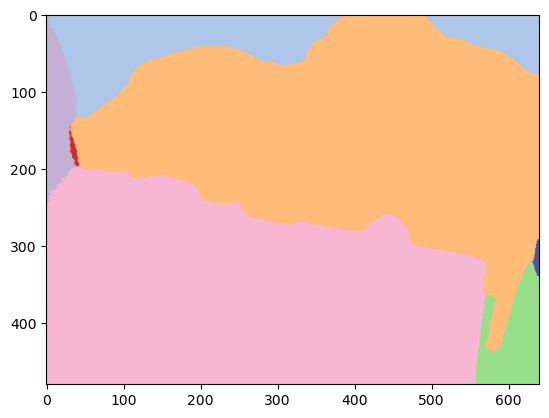

In [104]:
mask_dir = osp.join(SCANS_DIR, SCAN_ID, MASK_TYPE)
im_ids = os.listdir(mask_dir)
im_ids = sorted(im_ids, key=lambda i: int(os.path.splitext(os.path.basename(i))[0]))
im_paths = [osp.join(mask_dir, im_id) for im_id in im_ids]

for im_id in im_ids:
    im = osp.join(mask_dir, im_id)
    im = Image.open(im)
    
    im = np.array(CLASS_COLORS)[np.asarray(im) - 1].astype(np.uint8)    # -1 label correction

    plt.imshow(im)
    plt.show()
    break

In [105]:
# Save sequence as gif
save_dir = osp.join(SCANS_DIR, SCAN_ID)
save_name = f"{SCAN_ID}_{mask_type}_{MODEL_NAME}.gif"
print(osp.join(save_dir, save_name))
with imageio.get_writer(osp.join(save_dir, save_name), mode='I') as writer:
    for filename in Ctq(im_paths):
        image = imageio.imread(filename) - 1   # label correction
        image = np.array(CLASS_COLORS)[image].astype(np.uint8)
        writer.append_data(image)

/home/fsun/DeepViewAgg/notebooks/thesis_visualizations/scene0207_00/scene0207_00_ViT_masks_MVFusion_3D_small_6views.gif


  0%|          | 0/207 [00:00<?, ?it/s]

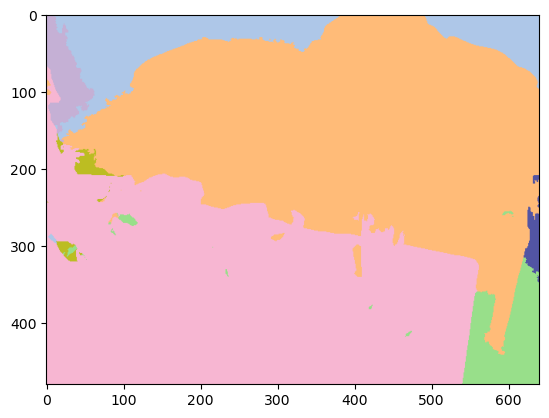

In [106]:
refined_mask_name = osp.join(f"{MASK_TYPE}_refined", MODEL_NAME)

mask_dir = osp.join(SCANS_DIR, SCAN_ID, refined_mask_name)

im_ids = os.listdir(mask_dir)
im_ids = sorted(im_ids, key=lambda i: int(os.path.splitext(os.path.basename(i))[0]))
im_paths = [osp.join(mask_dir, im_id) for im_id in im_ids]

for im_id in im_ids:
    im = osp.join(mask_dir, im_id)
    im = Image.open(im)
    im = np.array(CLASS_COLORS)[np.asarray(im)].astype(np.uint8)    # no label correction
    
    plt.imshow(im)
 
    plt.show()
    break


In [107]:
save_dir = osp.join(SCANS_DIR, SCAN_ID)
save_name = f"{SCAN_ID}_{mask_type}_{MODEL_NAME}.gif"
with imageio.get_writer(osp.join(save_dir, save_name), mode='I') as writer:
    for filename in Ctq(im_paths):
        image = imageio.imread(filename)
        image = np.array(CLASS_COLORS)[image].astype(np.uint8)    # no label correction
        writer.append_data(image)

  0%|          | 0/207 [00:00<?, ?it/s]

# 2D/3D Evaluation